In [3]:
import pandas as pd

# Specify the absolute file path
file_path = "./data/OPCdigits_400_split.csv"

# Read the CSV file
df = pd.read_csv(file_path)

In [4]:
df

,PatientID,RTSTART,RTSTART_Year,RT_modality_codes,AGE,GESLACHT_codes,Smoking_codes,Smoking_codes_noVSyes,PACK_YEARS,TSTAD_codes,...,CVthreefold_event,CVthreefold_LR_code,CVthreefold_RR_code,CVthreefold_LRR_code,CVthreefold_MET_code,CVthreefold_TumorSpecificSurvival_code,CVthreefold_OS_code,CVthreefold_DFS_code,CVthreefold_RFS_code,CVtime_event
0,UMCG-4399217,6/4/2012,2012,0,61,1,1,1,18,3,...,train,CV1,CV2,CV3,CV2,CV2,CV2,CV2,CV2,train
1,UMCG-0573601,12/9/2019,2019,1,72,1,1,1,30,3,...,train,CV1,CV3,CV1,CV3,CV3,CV3,CV1,CV1,test
2,UMCG-6143184,5/26/2014,2014,0,80,0,2,1,60,3,...,train,CV2,CV2,CV3,CV2,CV3,CV1,CV1,CV1,train
3,UMCG-6395952,9/25/2017,2017,0,70,1,2,1,56,3,...,train,CV2,CV2,CV1,CV1,CV3,CV2,CV3,CV1,train
4,UMCG-5908531,11/16/2020,2020,1,59,1,0,0,0,1,...,train,CV3,CV1,CV1,CV2,CV2,CV1,CV1,CV1,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,UMCG-2783403,1/26/2022,2022,0,68,1,1,1,23,2,...,test,test,test,test,test,test,test,test,test,test
396,UMCG-2294422,2/2/2022,2022,1,86,0,1,1,37,0,...,train,CV1,CV2,CV1,CV2,CV2,CV3,CV2,CV1,test
397,UMCG-0412861,2/14/2022,2022,1,69,1,1,1,47,3,...,train,CV1,CV3,CV2,CV3,CV3,CV2,CV3,CV1,test
398,UMCG-5325319,2/28/2022,2022,0,66,0,0,0,0,3,...,train,CV1,CV1,CV1,CV2,CV1,CV2,CV2,CV3,test


In [5]:
selected_columns = ['PatientID', 'RTSTART_Year', 'AGE', 'GESLACHT_codes', 'TSTAD_codes', 'NSTAD_codes', 'TSTAD_codes_123VS4', 'NSTAD_codes_N01VSN2VSN3']  


new_df = df[selected_columns]


new_df['PatientID'] = new_df['PatientID'].str.replace('UMCG-', '')

# Convert the 'PatientID' column to numeric
new_df['PatientID'] = pd.to_numeric(new_df['PatientID'])

# Display the modified DataFrame
print(new_df)

     PatientID  RTSTART_Year  AGE  GESLACHT_codes  TSTAD_codes  NSTAD_codes  \
0      4399217          2012   61               1            3            2   
1       573601          2019   72               1            3            3   
2      6143184          2014   80               0            3            3   
3      6395952          2017   70               1            3            4   
4      5908531          2020   59               1            1            1   
..         ...           ...  ...             ...          ...          ...   
395    2783403          2022   68               1            2            1   
396    2294422          2022   86               0            0            0   
397     412861          2022   69               1            3            3   
398    5325319          2022   66               0            3            3   
399    2291679          2022   47               0            1            4   

     TSTAD_codes_123VS4  NSTAD_codes_N01VSN2VSN3  


C:\Users\SAM\AppData\Local\Temp\ipykernel_352\1486046136.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['PatientID'] = new_df['PatientID'].str.replace('UMCG-', '')
C:\Users\SAM\AppData\Local\Temp\ipykernel_352\1486046136.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['PatientID'] = pd.to_numeric(new_df['PatientID'])


In [6]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(new_df, duration_col='RTSTART_Year', event_col=None)

# Display model summary
print(cph.summary)

                                 coef  exp(coef)      se(coef)  \
covariate                                                        
PatientID                1.035406e-07   1.000000  1.772158e-08   
AGE                     -1.519323e-02   0.984922  5.605450e-03   
GESLACHT_codes          -1.151842e-01   0.891202  1.116326e-01   
TSTAD_codes              1.469470e-01   1.158293  1.015851e-01   
NSTAD_codes              3.112766e-03   1.003118  8.433997e-02   
TSTAD_codes_123VS4      -3.159675e-01   0.729083  2.233812e-01   
NSTAD_codes_N01VSN2VSN3 -1.525902e-02   0.984857  2.436880e-01   

                         coef lower 95%  coef upper 95%  exp(coef) lower 95%  \
covariate                                                                      
PatientID                  6.880695e-08    1.382743e-07             1.000000   
AGE                       -2.617971e-02   -4.206754e-03             0.974160   
GESLACHT_codes            -3.339802e-01    1.036117e-01             0.716068   
TSTAD

In [7]:
survival_function = cph.predict_survival_function(new_df)

# Display the survival function
print(survival_function)

             0         1         2         3         4         5         6    \
2010.0  0.986696  0.992380  0.986561  0.985650  0.983436  0.982923  0.980005   
2011.0  0.930370  0.959617  0.929682  0.925067  0.913920  0.911357  0.896872   
2012.0  0.868327  0.922528  0.867072  0.858670  0.838547  0.833952  0.808221   
2013.0  0.813058  0.888519  0.811336  0.799839  0.772513  0.766316  0.731909   
2014.0  0.727182  0.833640  0.724811  0.709061  0.672117  0.663834  0.618511   
2015.0  0.648476  0.780845  0.645603  0.626605  0.582637  0.572898  0.520381   
2016.0  0.553496  0.713316  0.550151  0.528161  0.478210  0.467326  0.409824   
2017.0  0.480890  0.658269  0.477295  0.453796  0.401287  0.390014  0.331514   
2018.0  0.374278  0.570471  0.370527  0.346248  0.293561  0.282545  0.227167   
2019.0  0.254869  0.458061  0.251323  0.228713  0.181791  0.172372  0.127257   
2020.0  0.144249  0.330929  0.141414  0.123738  0.089385  0.082897  0.053936   
2021.0  0.057859  0.196399  0.056194  0.

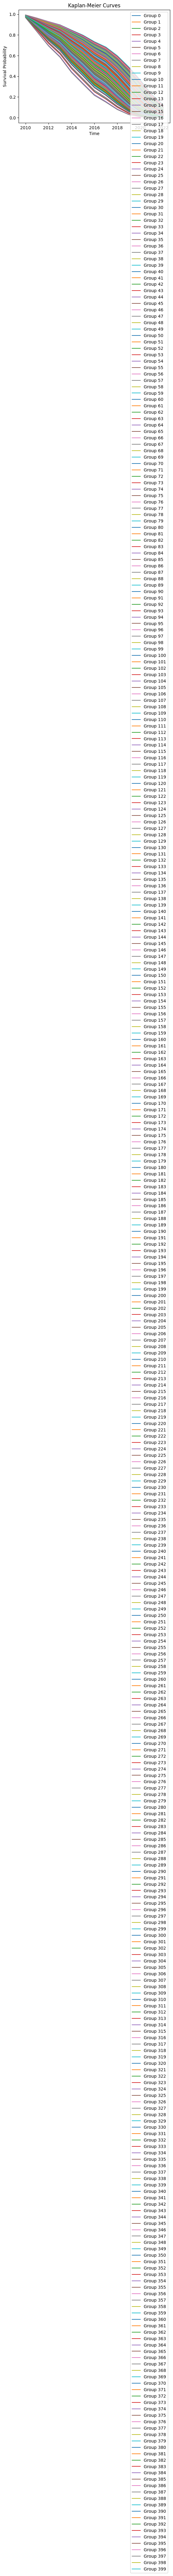

In [8]:
import matplotlib.pyplot as plt

for column in survival_function.columns:
    plt.plot(survival_function.index, survival_function[column], label=f'Group {column}')

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Kaplan-Meier Curves')
plt.legend()
plt.show()

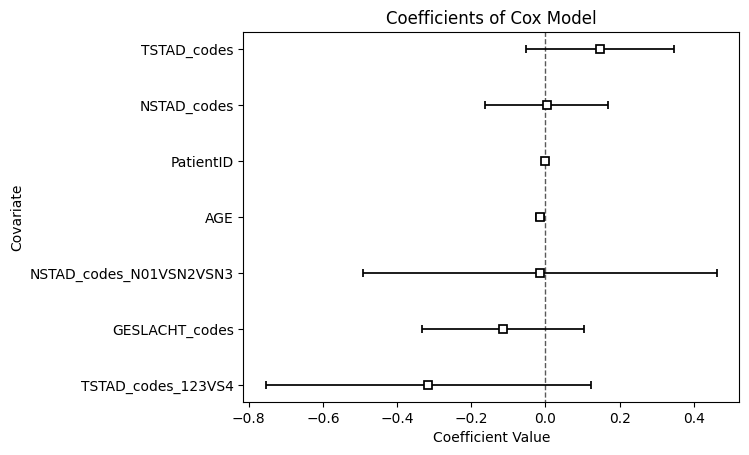

In [9]:
cph.plot()

plt.xlabel('Coefficient Value')
plt.ylabel('Covariate')
plt.title('Coefficients of Cox Model')
plt.show()